# CODSOFT INTERNSHIP, OCTOBER - NOVEMBER, 2023

## DOMAIN : ARTIFICIAL INTELLIGENCE

### PROBLEM STATEMENT :  Face Detection and Recognition

Develop an AI application that can detect and recognize faces in images or videos. Use pre-trained face detection models like Haar cascades or deep learning-based face detectors, and optionally add face recognition capabilities using techniques like Siamese networks or ArcFace.

### SOLUTION

### AUTHOR : ARITRA BAG

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### IMPORTING LIBRARIES

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
import keras.backend as k
import sklearn
import cv2
import pickle

from sklearn.model_selection import train_test_split

from keras.models import Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, Layer, Dropout, Flatten, Lambda
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarface/haarcascade_frontalface_alt2.xml')

### RENAMING ROOT DIRECTORY

In [4]:
ROOT_DIR = '/kaggle/input/avengers-face-recognition/cropped_images'
TEMP_DIR = '/kaggle/working/'

### DATASET DEMONSTRATION

In [5]:
labels = []
imgs = []

for (directories,folders,files) in os.walk(ROOT_DIR):
    for folder in (folders):
        folder_path = os.path.join(ROOT_DIR, folder)
        Files = os.listdir(folder_path)
        for File in Files:
            img_path = os.path.join(folder_path,File)
            img = cv2.imread(img_path)
            resized_img = cv2.resize(img, (64,64))
            #gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
            #final_img = np.expand_dims(gray_img, axis = -1)
            #imgs.append(final_img)
            imgs.append(resized_img)
            labels.append(str(folder))
            
imgs = np.array(imgs)
labels = np.array(labels)

In [6]:
imgs.shape

(274, 64, 64, 3)

In [7]:
reference = []
for i in range (0, len(imgs)):
    data = [[],[]]
    data[0] = imgs[i]
    data[1] = labels[i]
    reference.append(data)
    
reference = np.array(reference)
reference_images = pickle.dump(reference, open(os.path.join(TEMP_DIR, 'reference_images.pkl'), 'wb'))

/tmp/ipykernel_33/401849779.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  reference = np.array(reference)


In [8]:
def show_img(start,stop,rows):
        columns = int(np.ceil((stop+1-start)/rows))
        plt.figure(figsize = (columns*12,rows*9))
        for k in range (start,stop):
            fig_no = (k-start+1)
            plt.subplot(rows,columns,fig_no)
            plt.imshow(imgs[k])
            plt.title(labels[k],fontsize = 12.5*rows)
            plt.subplots_adjust(wspace = 0.2*rows, hspace = 0.2*rows)
        plt.show()

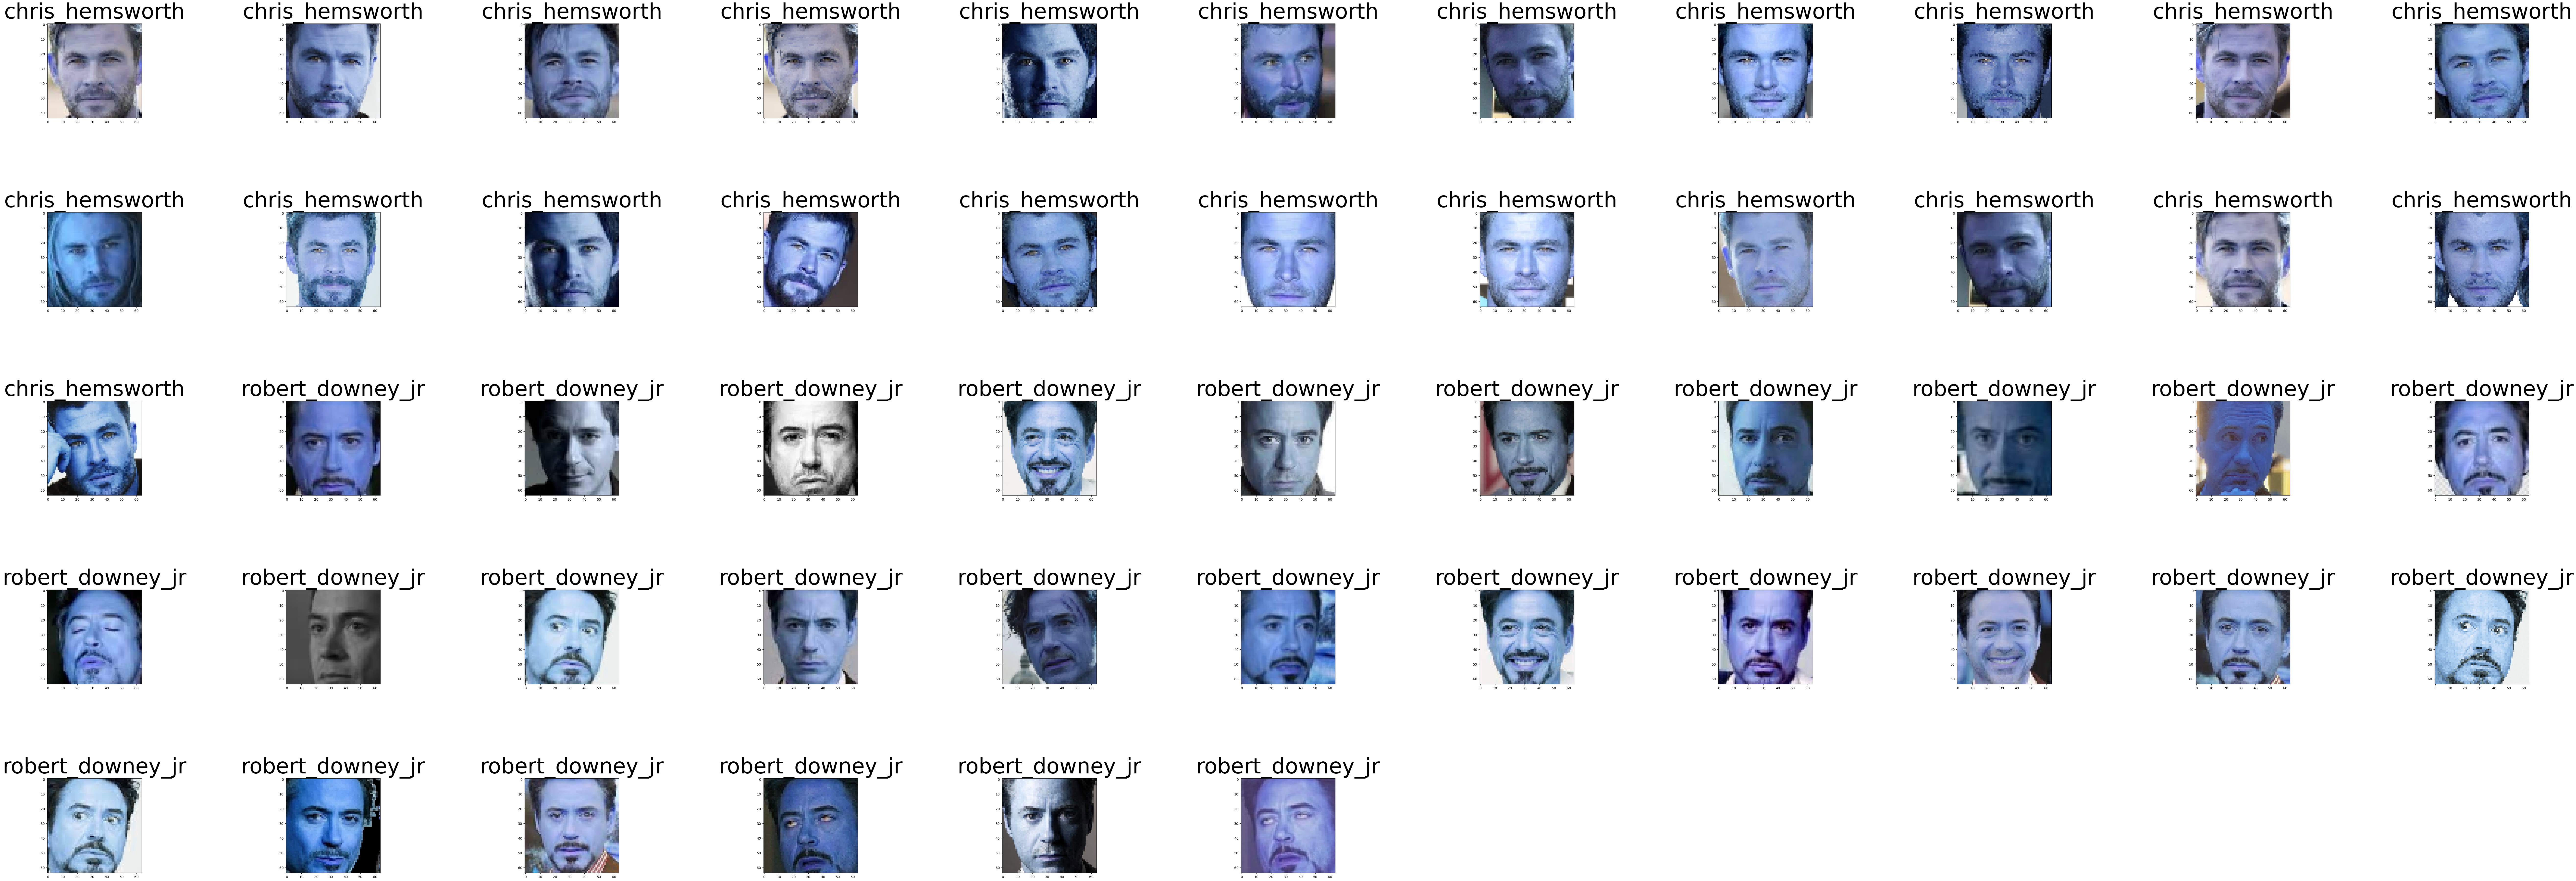

In [9]:
show_img(start = 200, stop = 250, rows = 5)

### CREATING IMAGE PAIRS

In [10]:
img_pairs = []
for i in range (0, len(imgs)):
         for j in range (0, len(imgs)):
            pair = [[],[],[]]
            if labels[j]==labels[i]:
                similarity = 1
            else:
                similarity = 0
            pair[0] = imgs[i]
            pair[1] = imgs[j]
            pair[2] = similarity
            img_pairs.append(pair)
            
img_pairs = np.array(img_pairs)

/tmp/ipykernel_33/2827383736.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_pairs = np.array(img_pairs)


In [11]:
img_pairs.shape

(75076, 3)

In [12]:
def display_pair(i):
    plt.subplot(1,2,1)
    plt.imshow(img_pairs[i,0])
    plt.subplot(1,2,2)
    plt.imshow(img_pairs[i,1])
    if img_pairs[i,2]==1:
        print("Positive Pair of Images (Similar)")
    else:
        print("Negative Pair of Images (Dissimilar)")

Positive Pair of Images (Similar)


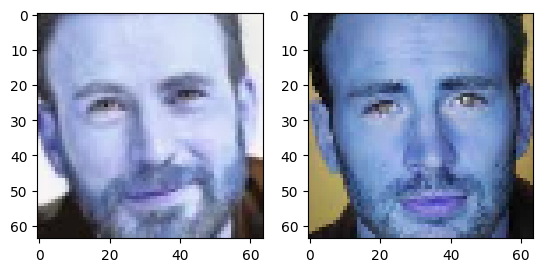

In [13]:
display_pair(1)

Negative Pair of Images (Dissimilar)


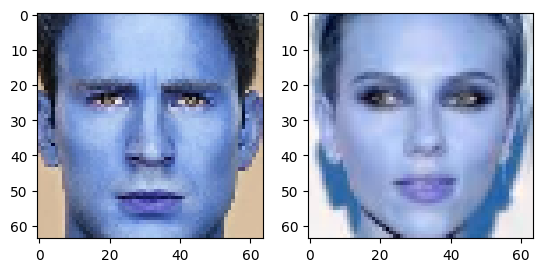

In [14]:
display_pair(4000)

### MODEL IMPLEMENTATION

In [15]:
#Embedding Layer
def embedding():
    #ip = Input((64, 64, 1))
    #detector = Conv2D(16, (8, 8), padding="same", activation="relu")(ip)
    #detector = MaxPooling2D(pool_size=(2, 2))(detector)
    #detector = Dropout(0.2)(detector)
    #detector = Conv2D(32, (16, 16), padding="same", activation="relu")(detector)
    #detector = MaxPooling2D(pool_size=(2, 2))(detector)
    #detector = Dropout(0.2)(detector)
    #detector = Conv2D(64, (16, 16), padding="same", activation="relu")(detector)
    #detector = MaxPooling2D(pool_size=(2, 2))(detector)
    
    base_model = MobileNetV2(input_shape=(64,64,3),include_top=False,weights='imagenet')
    for layer in base_model.layers:
        layer.trainable=False
    detector = base_model.output
    
    detector = Dropout(0.2)(detector)
    detector = GlobalAveragePooling2D()(detector)
    detector = Flatten()(detector)
    detector = Dense(512, activation = "relu")(detector)
    embedding_op = Dense(128, activation = "sigmoid")(detector)
    #embedding_layer = Model(inputs = ip, outputs = embedding_op)
    embedding_layer = Model(inputs = base_model.inputs, outputs = embedding_op)
    
    return embedding_layer

In [16]:
# Defining the Contrastive Loss
def contrastive_loss(y, preds, margin=1):
    y = tensorflow.cast(y, preds.dtype)
    squaredPreds = k.square(preds)
    squaredMargin = k.square(k.maximum(margin - preds, 0))
    loss = k.mean(y * squaredPreds + (1 - y) * squaredMargin)

    return loss

In [17]:
#Distance Function Creation (Euclidean Distance)
def distance(vectors):
    (anchor_values, test_values) = vectors
    sum_squared = k.sum(k.square(anchor_values - test_values), axis=1, keepdims=True)
    return k.sqrt(k.maximum(sum_squared, k.epsilon()))

In [18]:
#Overall Model Architecture
feature_extrator = embedding()
anchor_ip = Input(name="anchor", shape=imgs[0].shape)
test_ip = Input(name="test", shape=imgs[0].shape)

anchor_values = feature_extrator(anchor_ip)
test_values = feature_extrator(test_ip)

DistanceLayer = Lambda(distance)([anchor_values, test_values])

output = Dense(1, activation = "sigmoid") (DistanceLayer)

siamese_model = Model(inputs = [anchor_ip, test_ip], outputs = output)

siamese_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

9406464/9406464 [==============================] - 0s 0us/step


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 anchor (InputLayer)            [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 test (InputLayer)              [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 model (Functional)             (None, 128)          2979520     ['anchor[0][0]',                 
                                                                  'test[0][0]']                   
                                                                                                  
 lambda (Lambda)                (None, 1)            0           ['model[0][0]',            

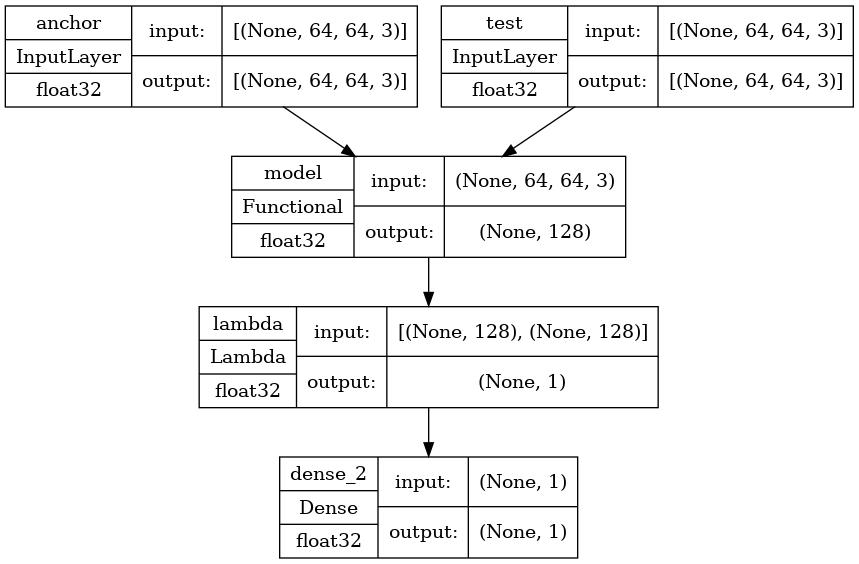

In [19]:
print(siamese_model.summary())
plot_model(siamese_model, to_file = 'siamese_model.png', show_shapes = True, show_dtype = True, show_layer_names = True)

### TRAINING

In [20]:
anchor = []
compare = []
result = []
for j in range(len(img_pairs)):
    anchor.append(img_pairs[j,0])
    compare.append(img_pairs[j,1])
    result.append(img_pairs[j,2])

anchor = np.array(anchor)
anchor = preprocess_input(anchor)
compare = np.array(compare)
compare = preprocess_input(compare)
result = np.array(result)   

In [21]:
print(anchor.shape)
print(compare.shape)
print(result.shape)

(75076, 64, 64, 3)
(75076, 64, 64, 3)
(75076,)


In [22]:
train_anchor, test_anchor, train_compare, test_compare, train_result, test_result = train_test_split(anchor, compare, result, test_size = 0.15, shuffle  = True, random_state = 69)
print(train_anchor.shape)
print(train_compare.shape)
print(train_result.shape)
print(test_anchor.shape)
print(test_compare.shape)
print(test_result.shape)

(63814, 64, 64, 3)
(63814, 64, 64, 3)
(63814,)
(11262, 64, 64, 3)
(11262, 64, 64, 3)
(11262,)


In [23]:
siamese_model.fit([train_anchor, train_compare], train_result, epochs = 10, batch_size = 256, validation_data = ([test_anchor, test_compare], test_result))

Epoch 1/10


2023-11-09 21:27:45.808600: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/model/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


250/250 [==============================] - 29s 68ms/step - loss: 0.2061 - accuracy: 0.9295 - val_loss: 0.1390 - val_accuracy: 1.0000
Epoch 2/10
250/250 [==============================] - 12s 48ms/step - loss: 0.1225 - accuracy: 1.0000 - val_loss: 0.1107 - val_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 12s 49ms/step - loss: 0.0989 - accuracy: 1.0000 - val_loss: 0.0906 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 12s 48ms/step - loss: 0.0815 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 1.0000
Epoch 5/10
250/250 [==============================] - 12s 48ms/step - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 1.0000
Epoch 6/10
250/250 [==============================] - 12s 48ms/step - loss: 0.0574 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 12s 48ms/step - loss: 0.0488 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 1.0000
Epo

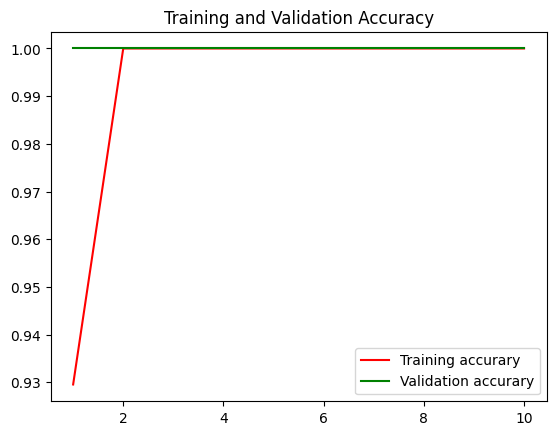

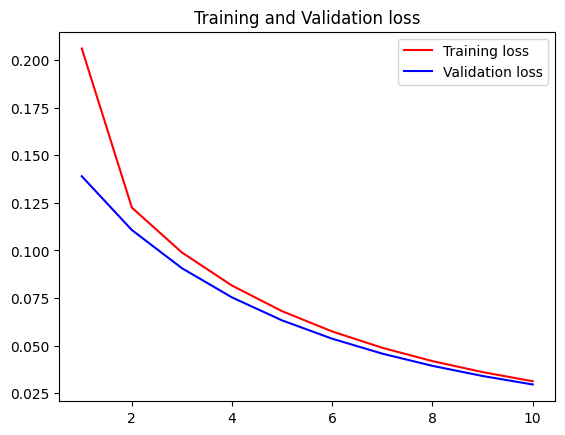

In [24]:
acc=siamese_model.history.history['accuracy']
val_acc=siamese_model.history.history['val_accuracy']
loss=siamese_model.history.history['loss']
val_loss=siamese_model.history.history['val_loss']
epochs=range(1,len(acc)+1)

import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='Training accurary')
plt.plot(epochs,val_acc,'g',label='Validation accurary')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

### REAL TIME TEST

In [105]:
def find_face(i):
    img = imgs[i]
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.5, minNeighbors = 2, minSize = (64,64))
    if faces is None:
        print('No frontal face detected')         
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        extracted_face = img[y:y+h, x:x+w]    
        face = cv2. resize(img, (64,64))
        face_array = np.array(face)
        test = face_array.reshape(-1,64,64,3)

        similarity_scores = []

        for j in range (len(reference)):
            anchor = reference[j,0]
            anchor = anchor.reshape(-1,64,64,3)
            scores = siamese_model.predict([anchor, test],verbose = 0)
            similarity_scores.append(scores)
            face_score = np.max(similarity_scores)
            if face_score < 0.60:
                face_id = 'unrecognized_face'
            else:
                position = int(np.argmax(similarity_scores))
                face_id = reference[position,1]

            output = str(face_id) + " : "  + str(np.round(face_score,2))

        cv2.putText(img,output,(x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)
        plt.imshow(img)
        print(output)

mark_ruffalo : 0.88


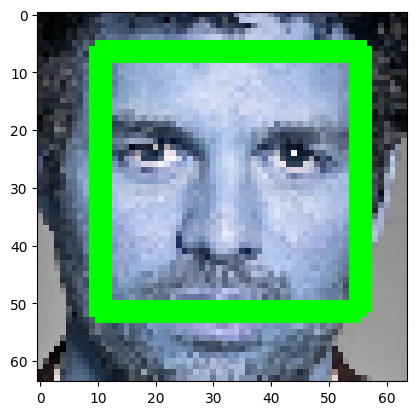

In [106]:
find_face(67)

chris_hemsworth : 0.88


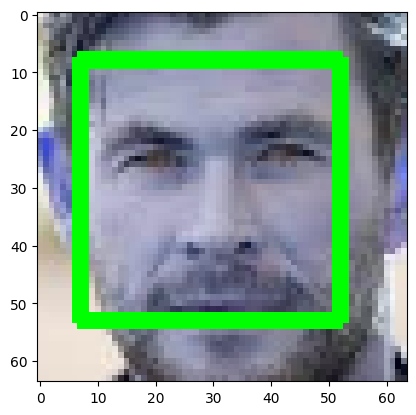

In [121]:
find_face(200)

robert_downey_jr : 0.88


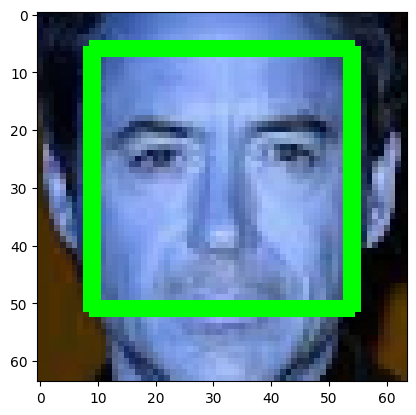

In [133]:
find_face(273)

scarlett_johansson : 0.88


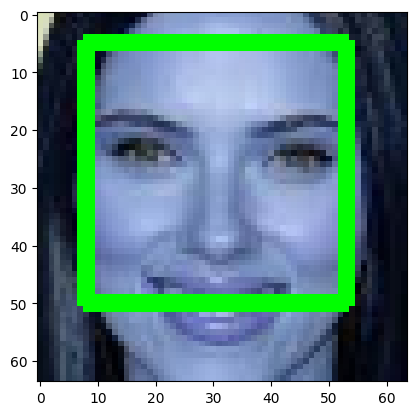

In [131]:
find_face(167)

chris_evans : 0.88


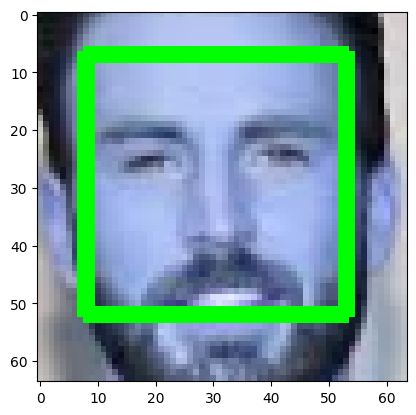

In [136]:
find_face(47)

In [137]:
siamese_model.save(os.path.join(TEMP_DIR, 'siamese_model.h5'))